<a href="https://colab.research.google.com/github/prashantmalan/ALM/blob/main/ALM_balancesheet_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Functional Description of Investment Bank Balance Sheet Simulation</h2>

<p>This code generates a simulated balance sheet for an investment bank, categorizes assets into High-Quality Liquid Assets (HQLA) categories, and provides summary statistics. Here's a detailed explanation of the code's functionality:</p>

<h3>1. Balance Sheet Generation</h3>
<ul>
    <li><strong>generate_investment_bank_balance_sheet:</strong> This function generates a simulated balance sheet with a specified number of transactions. It creates assets and liabilities based on predefined types, maturity ranges, and interest rates. Each asset and liability type has a specified weight, which determines its proportion in the balance sheet.</li>
    <li>The function returns a DataFrame representing the balance sheet, which includes transaction details such as type, amount, maturity date, and interest rate.</li>
</ul>

<h3>2. Maturity Analysis and Summary Statistics</h3>
<ul>
    <li><strong>print_maturity_analysis:</strong> This function analyzes and prints the maturity distribution of assets or liabilities, categorizing them into predefined maturity buckets (e.g., 0-30 days, 1-2 years).</li>
    <li>The code prints a summary of the total assets and liabilities and provides a breakdown of asset and liability composition by type, showing the total amount and percentage share.</li>
</ul>

<h3>3. HQLA Categorization</h3>
<ul>
    <li><strong>assign_hqla_categories:</strong> This function assigns HQLA categories to assets based on their type. It uses a mapping of asset types to HQLA categories and assigns haircuts accordingly.</li>
    <li>Assets are categorized into 'Level 1', 'Level 2A', 'Level 2B', or 'Non-HQLA' categories, each with a specific haircut that reflects its liquidity level.</li>
</ul>

<h3>4. Data Export</h3>
<ul>
    <li>The balance sheet is exported to a CSV file named <code>investment_bank_balance_sheet.csv</code>, allowing for further analysis and record-keeping.</li>
</ul>



In [73]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)

def generate_investment_bank_balance_sheet(num_transactions=10000):
    current_date = datetime.now()

    # Asset Types (predominantly longer-term)
    asset_types = {
        'Corporate Loans': {
            'maturity_range': (1825, 3650),  # 5-10 years
            'rate_range': (0.045, 0.085),
            'weight': 0.40  # 25% of assets
        },
        'Investment Securities': {
            'maturity_range': (1095, 2555),  # 3-7 years
            'rate_range': (0.03, 0.06),
            'weight': 0.05  # 5% of assets
        },
        'Trading Assets': {
            'maturity_range': (1, 365),  # Up to 1 year
            'rate_range': (0.02, 0.055),
            'weight': 0.05 # 15% of assets
        },
        'Syndicated Loans': {
            'maturity_range': (2555, 4380),  # 7-12 years
            'rate_range': (0.055, 0.095),
            'weight': 0.35  # 25% of assets
        },
        'Structured Products': {
            'maturity_range': (1825, 3650),  # 5-10 years
            'rate_range': (0.04, 0.08),
            'weight': 0.15  # 15% of assets
        }
    }

    # Liability Types (predominantly shorter-term with some long-term funding)
    liability_types = {
        'Wholesale Deposits': {
            'maturity_range': (30, 90),  # 1-90 days
            'rate_range': (0.01, 0.03),
            'weight': 0.10  # 25% of liabilities
        },
        'Money Market Funding': {
            'maturity_range': (90, 180),  # 1-180 days
            'rate_range': (0.02, 0.04),
            'weight': 0.35  # 20% of liabilities
        },
        'Repo Agreements': {
            'maturity_range': (1, 5),  # 1-30 days
            'rate_range': (0.01, 0.025),
            'weight': 0.35  # 20% of liabilities
        },
        'Long-term Debt': {
            'maturity_range': (1825, 3650),  # 5-10 years
            'rate_range': (0.04, 0.07),
            'weight': 0.10  # 15% of liabilities
        },
        'Structured Notes': {
            'maturity_range': (30, 1825),  # 2-5 years
            'rate_range': (0.03, 0.06),
            'weight': 0.10  # 10% of liabilities
        },
        'Interbank Borrowing': {
            'maturity_range': (1, 90),  # 1-90 days
            'rate_range': (0.02, 0.04),
            'weight': 0.05  # 10% of liabilities
        }
    }

    assets = []
    liabilities = []

    # Generate Assets
    for asset_type, characteristics in asset_types.items():
        n_transactions = int(num_transactions/2 * characteristics['weight'])
        for i in range(n_transactions):
            maturity_days = np.random.randint(*characteristics['maturity_range'])
            rate = np.random.uniform(*characteristics['rate_range'])
            amount = np.random.uniform(5000000, 20000000)  # 5M to 20M per transaction

            assets.append({
                'transaction_id': f'A{len(assets)+1:05d}',
                'type': asset_type,
                'amount': amount,
                'start_date': current_date,
                'maturity_date': current_date + timedelta(days=maturity_days),
                'interest_rate': rate,
                'remaining_maturity_days': maturity_days
            })

    # Generate Liabilities
    for liability_type, characteristics in liability_types.items():
        n_transactions = int(num_transactions/2 * characteristics['weight'])
        for i in range(n_transactions):
            maturity_days = np.random.randint(*characteristics['maturity_range'])
            rate = np.random.uniform(*characteristics['rate_range'])
            amount = np.random.uniform(5000000, 20000000)  # 5M to 20M per transaction

            liabilities.append({
                'transaction_id': f'L{len(liabilities)+1:05d}',
                'type': liability_type,
                'amount': amount,
                'start_date': current_date,
                'maturity_date': current_date + timedelta(days=maturity_days),
                'interest_rate': rate,
                'remaining_maturity_days': maturity_days
            })

    # Create DataFrames
    assets_df = pd.DataFrame(assets)
    liabilities_df = pd.DataFrame(liabilities)

    # Add side identifier
    assets_df['side'] = 'Asset'
    liabilities_df['side'] = 'Liability'

    # Combine into one balance sheet
    balance_sheet = pd.concat([assets_df, liabilities_df], axis=0)

    return balance_sheet

# Generate the balance sheet
balance_sheet = generate_investment_bank_balance_sheet()

# Analysis and Summary Statistics
def print_maturity_analysis(df, side):
    maturity_buckets = [
        (0, 30, '0-30 days'),
        (31, 90, '31-90 days'),
        (91, 180, '91-180 days'),
        (181, 365, '181-365 days'),
        (366, 730, '1-2 years'),
        (731, 1825, '2-5 years'),
        (1826, 3650, '5-10 years'),
        (3651, float('inf'), '>10 years')
    ]

    print(f"\n{side} Maturity Analysis:")
    print("-" * 50)

    for start, end, label in maturity_buckets:
        mask = (df['remaining_maturity_days'] > start) & (df['remaining_maturity_days'] <= end)
        bucket_sum = df[mask]['amount'].sum()
        bucket_pct = (bucket_sum / df['amount'].sum()) * 100
        print(f"{label}: ${bucket_sum/1e6:.2f}M ({bucket_pct:.1f}%)")

print("\nBalance Sheet Summary:")
print("----------------------")
print(f"Total Assets: ${balance_sheet[balance_sheet['side']=='Asset']['amount'].sum()/1e6:.2f}M")
print(f"Total Liabilities: ${balance_sheet[balance_sheet['side']=='Liability']['amount'].sum()/1e6:.2f}M")

print("\nAsset Composition:")
asset_summary = balance_sheet[balance_sheet['side']=='Asset'].groupby('type')['amount'].agg(['sum', 'count'])
asset_summary['percentage'] = (asset_summary['sum'] / asset_summary['sum'].sum()) * 100
print(asset_summary)

print("\nLiability Composition:")
liability_summary = balance_sheet[balance_sheet['side']=='Liability'].groupby('type')['amount'].agg(['sum', 'count'])
liability_summary['percentage'] = (liability_summary['sum'] / liability_summary['sum'].sum()) * 100
print(liability_summary)

# Print maturity analysis
print_maturity_analysis(balance_sheet[balance_sheet['side']=='Asset'], 'Assets')
print_maturity_analysis(balance_sheet[balance_sheet['side']=='Liability'], 'Liabilities')

# Save to CSV
balance_sheet.to_csv('investment_bank_balance_sheet.csv', index=False)

def assign_hqla_categories(balance_sheet_df):
    """Assign HQLA categories to assets based on type"""

    # Define the mapping of asset types to HQLA categories
    hqla_mapping = {
        'Corporate Loans': 'Non-HQLA',
        'Investment Securities': 'Level 2A',
        'Trading Assets': 'Level 1',
        'Syndicated Loans': 'Non-HQLA',
        'Structured Products': 'Level 2B'
    }

    # Define haircuts for each HQLA category
    hqla_haircuts = {
        'Level 1': 0.00,
        'Level 2A': 0.15,
        'Level 2B': 0.50,
        'Non-HQLA': 1.00
    }

    # Ensure balance_sheet_df is a DataFrame
    balance_sheet_df = pd.DataFrame(balance_sheet_df)

    # Add HQLA category and haircut to each asset
    balance_sheet_df['hqla_category'] = balance_sheet_df.apply(
        lambda row: hqla_mapping.get(row['type'], 'Non-HQLA') if row['side'] == 'Asset' else None, axis=1
    )
    balance_sheet_df['haircut'] = balance_sheet_df.apply(
        lambda row: hqla_haircuts.get(row['hqla_category'], 1.00) if row['side'] == 'Asset' else None, axis=1
    )

    return balance_sheet_df

def assign_hqla_categories(balance_sheet_df):
    """Assign HQLA categories to assets based on type"""

    # Define the mapping of asset types to HQLA categories
    hqla_mapping = {
        'Corporate Loans': 'Non-HQLA',
        'Investment Securities': 'Level 2A',
        'Trading Assets': 'Level 1',
        'Syndicated Loans': 'Non-HQLA',
        'Structured Products': 'Level 2B'
    }

    # Define haircuts for each HQLA category
    hqla_haircuts = {
        'Level 1': 0.00,
        'Level 2A': 0.15,
        'Level 2B': 0.50,
        'Non-HQLA': 1.00
    }

    # Ensure balance_sheet_df is a DataFrame
    balance_sheet_df = pd.DataFrame(balance_sheet_df)

    # Add HQLA category and haircut to each asset
    balance_sheet_df['hqla_category'] = balance_sheet_df.apply(
        lambda row: hqla_mapping.get(row['type'], 'Non-HQLA') if row['side'] == 'Asset' else None, axis=1
    )
    balance_sheet_df['haircut'] = balance_sheet_df.apply(
        lambda row: hqla_haircuts.get(row['hqla_category'], 1.00) if row['side'] == 'Asset' else None, axis=1
    )

    return balance_sheet_df

balance_sheet= assign_hqla_categories(balance_sheet)


Balance Sheet Summary:
----------------------
Total Assets: $62079.90M
Total Liabilities: $65817.46M

Asset Composition:
                                sum  count  percentage
type                                                  
Corporate Loans        2.518963e+10   2000   40.576152
Investment Securities  2.944442e+09    250    4.742987
Structured Products    9.223934e+09    750   14.858165
Syndicated Loans       2.172079e+10   1750   34.988437
Trading Assets         3.001103e+09    250    4.834259

Liability Composition:
                               sum  count  percentage
type                                                 
Interbank Borrowing   3.174219e+09    250    4.822761
Long-term Debt        6.275777e+09    500    9.535125
Money Market Funding  2.184868e+10   1750   33.195873
Repo Agreements       2.205844e+10   1750   33.514577
Structured Notes      6.107528e+09    500    9.279495
Wholesale Deposits    6.352813e+09    500    9.652169

Assets Maturity Analysis:
----------

<h3>5. HQLA Composition Analysis</h3>
<ul>
    <li><strong>HQLA Composition Calculation:</strong> This section of the code calculates the composition of High-Quality Liquid Assets (HQLA) as a percentage of total assets. It provides insights into how much of the bank's assets are classified as HQLA, which is critical for assessing liquidity.</li>
    <li><strong>Grouping and Summation:</strong> The code groups assets by their HQLA category and calculates the total amount for each category using the <code>groupby</code> and <code>sum</code> methods.</li>
    <li><strong>Percentage Calculation:</strong> It calculates the percentage of each HQLA category relative to the total assets by dividing the HQLA composition by the total asset amount and multiplying by 100.</li>
    <li><strong>Output:</strong> The results are printed as "HQLA Composition (% of Total Assets)", providing a clear overview of the liquidity profile of the asset portfolio.</li>
</ul>

In [74]:


hqla_composition = balance_sheet[balance_sheet['side'] == 'Asset'].groupby('hqla_category')['amount'].sum()
total_assets = balance_sheet[balance_sheet['side'] == 'Asset']['amount'].sum()
hqla_composition_percentage = (hqla_composition / total_assets) * 100
print("\nHQLA Composition (% of Total Assets):")
hqla_composition_percentage



HQLA Composition (% of Total Assets):


,amount
hqla_category,
Level 1,4.834259
Level 2A,4.742987
Level 2B,14.858165
Non-HQLA,75.564588


<h3>6. Asset and Liability Maturity Profile Visualization</h3>
<ul>
    <li><strong>Purpose:</strong> This code segment visualizes the maturity profile of assets and liabilities by year, providing insights into how the bank's financial obligations and holdings are distributed over time.</li>
    <li><strong>Maturity Year Extraction:</strong> The code first extracts the year from the maturity date of each transaction and adds it as a new column, <code>maturity_year</code>, to the balance sheet DataFrame.</li>
    <li><strong>Grouping and Summation:</strong> It groups the assets and liabilities by their maturity year and calculates the total amount maturing in each year using the <code>groupby</code> and <code>sum</code> methods.</li>
    <li><strong>Bar Chart Visualization:</strong> A bar chart is created using Matplotlib to compare the maturity amounts of assets and liabilities for each year. The assets are represented in blue bars, while liabilities are shown in red bars, with a slight offset for clarity.</li>
    <li><strong>Chart Customization:</strong> The chart includes labeled axes, a title ("Asset and Liability Maturity Profile"), and a legend to distinguish between assets and liabilities.</li>
    <li><strong>Presentation:</strong> The x-ticks are rotated for better readability, and <code>plt.tight_layout()</code> is used to ensure that the layout is not overlapping.</li>
</ul>

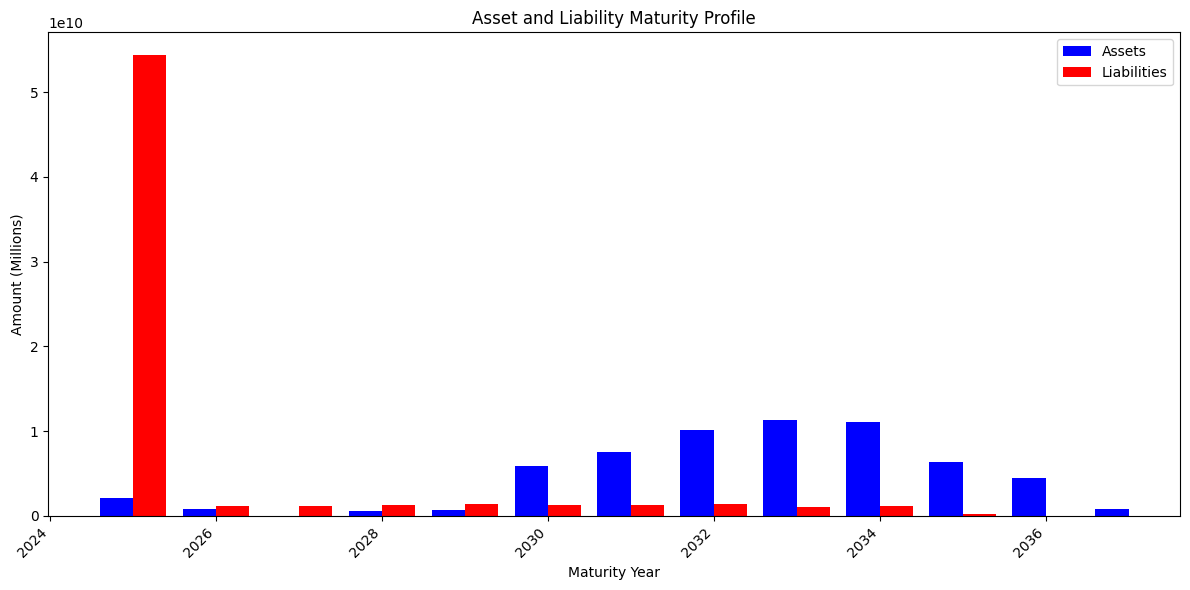

,transaction_id,type,amount,start_date,maturity_date,interest_rate,remaining_maturity_days,side,hqla_category,haircut,maturity_year
0,A00001,Corporate Loans,7.751522e+06,2025-03-25 04:45:57.800055,2033-04-23 04:45:57.800055,0.076862,2951,Asset,Non-HQLA,1.0,2033
1,A00002,Corporate Loans,7.340280e+06,2025-03-25 04:45:57.800055,2033-03-23 04:45:57.800055,0.068946,2920,Asset,Non-HQLA,1.0,2033
2,A00003,Corporate Loans,1.188873e+07,2025-03-25 04:45:57.800055,2031-07-03 04:45:57.800055,0.048999,2291,Asset,Non-HQLA,1.0,2031
3,A00004,Corporate Loans,1.562109e+07,2025-03-25 04:45:57.800055,2034-01-18 04:45:57.800055,0.069045,3221,Asset,Non-HQLA,1.0,2034
4,A00005,Corporate Loans,1.582998e+07,2025-03-25 04:45:57.800055,2034-11-03 04:45:57.800055,0.047256,3510,Asset,Non-HQLA,1.0,2034


In [75]:


import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


balance_sheet['maturity_year'] = balance_sheet['maturity_date'].dt.year

asset_maturity = balance_sheet[balance_sheet['side'] == 'Asset'].groupby('maturity_year')['amount'].sum()
liability_maturity = balance_sheet[balance_sheet['side'] == 'Liability'].groupby('maturity_year')['amount'].sum()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(asset_maturity.index - 0.2, asset_maturity.values, width=0.4, label='Assets', color='blue')
ax.bar(liability_maturity.index + 0.2, liability_maturity.values, width=0.4, label='Liabilities', color='red')

ax.set_xlabel('Maturity Year')
ax.set_ylabel('Amount (Millions)')
ax.set_title('Asset and Liability Maturity Profile')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
balance_sheet.head()

<h3>7. Daily Net Cash Outflow and HQLA Calculation</h3>
<ul>
    <li><strong>Purpose:</strong> This code segment calculates and displays the daily net cash outflows and High-Quality Liquid Assets (HQLA) over a 7-day period, providing insights into short-term liquidity management.</li>
    <li><strong>DataFrame Initialization:</strong> A DataFrame named <code>daily_data</code> is initialized with columns for the date, net cash outflow, total HQLA, and cumulative HQLA.</li>
    <li><strong>Date Range:</strong> The calculation period is set to 7 days, starting from the earliest transaction date in the balance sheet.</li>
    <li><strong>Net Cash Outflow Calculation:</strong> For each day, the code calculates the net cash outflow by subtracting the total cash inflows (from maturing assets) from the total cash outflows (from maturing liabilities).</li>
    <li><strong>HQLA Calculation:</strong> The total amount of HQLA is calculated for each day by summing the amounts of assets categorized as HQLA.</li>
    <li><strong>Cumulative HQLA Calculation:</strong> The cumulative HQLA is updated daily, adding the current day's HQLA to the cumulative total from the previous day.</li>
    <li><strong>Data Collection:</strong> Daily calculations are appended to the <code>daily_data</code> DataFrame.</li>
    <li><strong>Total Net Cash Outflow:</strong> After the loop, the total net cash outflow over the 7-day period is calculated and displayed.</li>
    <li><strong>Output:</strong> The code prints a table of daily net cash outflows and HQLA, along with the total net cash outflow for the 7-day period.</li>
</ul>

In [76]:

import pandas as pd
from datetime import datetime, timedelta


daily_data = pd.DataFrame(columns=['Date', 'Net_Cash_Outflow', 'Total_HQLA', 'Cumulative_HQLA'])

start_date = balance_sheet['start_date'].min()
end_date = start_date + timedelta(days=6)  # 7 days from start_date

current_date = start_date
while current_date <= end_date:
    # Net Cash Outflow
    cash_outflows = balance_sheet[
        (balance_sheet['side'] == 'Liability') &
        (balance_sheet['maturity_date'] == current_date)
    ]['amount'].sum()

    cash_inflows = balance_sheet[
        (balance_sheet['side'] == 'Asset') &
        (balance_sheet['maturity_date'] == current_date)
    ]['amount'].sum()

    net_cash_outflow = cash_outflows - cash_inflows

    # HQLA
    hqla_assets = balance_sheet[
        (balance_sheet['side'] == 'Asset') &
        (balance_sheet['hqla_category'] != 'Non-HQLA')
    ]['amount'].sum()

    # Cumulative HQLA
    if len(daily_data) == 0:
        cumulative_hqla = hqla_assets
    else:
        cumulative_hqla = daily_data['Cumulative_HQLA'].iloc[-1] + hqla_assets


    daily_data = pd.concat([daily_data, pd.DataFrame({
        'Date': [current_date],
        'Net_Cash_Outflow': [net_cash_outflow],
        'Total_HQLA': [hqla_assets],
        'Cumulative_HQLA': [cumulative_hqla]
    })], ignore_index=True)

    current_date += timedelta(days=1)

# Calculate sum of Net Cash Outflow for 7 days
total_net_cash_outflow = daily_data['Net_Cash_Outflow'].sum()

# Display the table
print("Daily Net Cash Outflow and HQLA")
print("------------------------------")
print(daily_data)
print("\nTotal Net Cash Outflow for 7 days:", total_net_cash_outflow)


Daily Net Cash Outflow and HQLA
------------------------------
                        Date  Net_Cash_Outflow    Total_HQLA  Cumulative_HQLA
0 2025-03-25 04:45:57.800055      0.000000e+00  1.516948e+10     1.516948e+10
1 2025-03-26 04:45:57.800055      6.117477e+09  1.516948e+10     3.033896e+10
2 2025-03-27 04:45:57.800055      5.202568e+09  1.516948e+10     4.550844e+10
3 2025-03-28 04:45:57.800055      5.441773e+09  1.516948e+10     6.067791e+10
4 2025-03-29 04:45:57.800055      5.472182e+09  1.516948e+10     7.584739e+10
5 2025-03-30 04:45:57.800055      6.095867e+07  1.516948e+10     9.101687e+10
6 2025-03-31 04:45:57.800055      1.996104e+07  1.516948e+10     1.061863e+11

Total Net Cash Outflow for 7 days: 22314920140.340134


<h3>8. Simulation of Liability Maturation and Balance Sheet Impact</h3>
<ul>
    <li><strong>Purpose:</strong> This code simulates the maturation of liabilities and its impact on the balance sheet over a specified period, illustrating how liabilities affect total assets and liabilities.</li>
    <li><strong>Simulation Function:</strong> The <code>simulate_liability_maturing</code> function simulates the daily maturation of liabilities. It reduces assets to cover maturing liabilities and updates the balance sheet accordingly.</li>
    <li><strong>Simulation Process:</strong>
        <ul>
            <li>The function iterates over each day in the simulation period, identifying liabilities maturing on or before the current date.</li>
            <li>If maturing liabilities exist, it reduces assets in the order of their maturity to cover the liability amounts, removing or adjusting asset entries as needed.</li>
            <li>Maturing liabilities are removed from the balance sheet.</li>
            <li>The balance sheet state is recorded for each day of the simulation.</li>
        </ul>
    </li>
    <li><strong>Visualization:</strong> After the simulation, a line plot is generated using Matplotlib to visualize the change in total assets and liabilities over time.
        <ul>
            <li><code>Total Assets</code> and <code>Total Liabilities</code> are plotted against the number of simulation days, providing a visual representation of the balance sheet dynamics.</li>
            <li>The plot includes labeled axes, a title ("Impact of Liability Maturation on Balance Sheet"), and a legend to distinguish between assets and liabilities.</li>
        </ul>
    </li>
    <li><strong>Output:</strong> The plot offers insights into how liability maturation impacts the balance sheet, highlighting potential liquidity pressures and changes in financial stability.</li>
</ul>

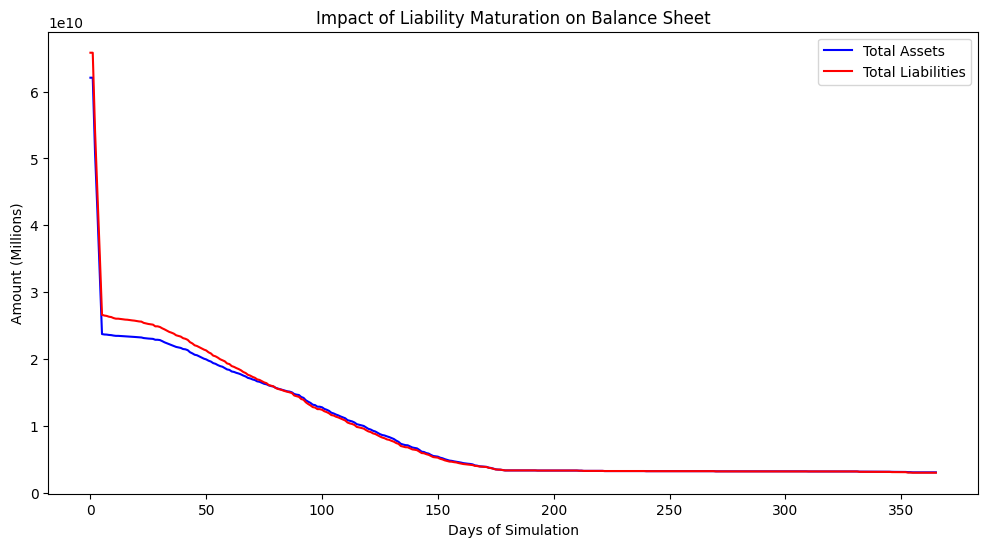

In [77]:

import matplotlib.pyplot as plt

def simulate_liability_maturing(balance_sheet, days_to_simulate=365):
  """Simulates liability maturing and its impact on the balance sheet.

  Args:
    balance_sheet: The pandas DataFrame representing the balance sheet.
    days_to_simulate: The number of days to simulate.

  Returns:
    A list of balance sheets at each step of the simulation.
  """
  balance_sheet_history = [balance_sheet.copy()]
  for day in range(days_to_simulate):
    current_date = datetime.now() + timedelta(days=day)
    maturing_liabilities = balance_sheet[
        (balance_sheet['side'] == 'Liability') &
        (balance_sheet['maturity_date'] <= current_date)
    ].copy()

    if not maturing_liabilities.empty:
      # Reduce assets to cover maturing liabilities
      total_maturing_liabilities = maturing_liabilities['amount'].sum()

      # Select assets for repayment in order of their maturity
      sorted_assets = balance_sheet[balance_sheet['side'] == 'Asset'].sort_values(by=['maturity_date'])

      for _, asset in sorted_assets.iterrows():
        if total_maturing_liabilities <= 0:
          break
        if asset['amount'] <= total_maturing_liabilities:
          total_maturing_liabilities -= asset['amount']
          balance_sheet = balance_sheet.drop(asset.name)
        else:
          balance_sheet.loc[asset.name, 'amount'] -= total_maturing_liabilities
          total_maturing_liabilities = 0


      # Remove maturing liabilities from the balance sheet
      balance_sheet = balance_sheet[~balance_sheet.index.isin(maturing_liabilities.index)]

    balance_sheet_history.append(balance_sheet.copy())
  return balance_sheet_history


# Simulate liability maturation
balance_sheet_history = simulate_liability_maturing(balance_sheet)

# Plot the change in total assets and liabilities over time
total_assets = [df[df['side'] == 'Asset']['amount'].sum() for df in balance_sheet_history]
total_liabilities = [df[df['side'] == 'Liability']['amount'].sum() for df in balance_sheet_history]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(total_assets, label='Total Assets', color='blue')
ax.plot(total_liabilities, label='Total Liabilities', color='red')

ax.set_xlabel('Days of Simulation')
ax.set_ylabel('Amount (Millions)')
ax.set_title('Impact of Liability Maturation on Balance Sheet')
ax.legend()
plt.show()



### Simulation of Balance Sheet Valuation Under Various Scenarios


**Purpose:**  
This code simulates the valuation of a balance sheet over a 30-day period under different rollover scenarios. It assesses the impact of liability maturities and funding challenges on the balance sheet size.


**Simulation Function:**  
- The `simulate_balance_sheet_valuation` function runs the simulation for four scenarios: High Rollover, Medium Rollover, Low Rollover, and Stress Scenario.

- Each scenario has specific probabilities for rollover success and parameters affecting asset reduction and new funding ratios.
- For each day, the function calculates the total maturing liabilities and applies a reduction to current assets based on scenario-specific parameters, recording the results daily.


**Data Visualization:**  
- **Balance Sheet Size Evolution Plot:** A line plot shows the percentage of the initial balance sheet size over 30 days for each scenario, providing insights into how the balance sheet evolves under different conditions.

- **Absolute Balance Sheet Size Plot:** Another plot displays the absolute balance sheet size in billions, offering a clear view of the total assets over time.
- **Heatmap:** A heatmap visualizes the balance sheet size ratio by day and scenario, highlighting periods of significant change and the relative stability of different scenarios.


**Summary Statistics:**  
- The code prints detailed statistics for each scenario, including initial and final balance sheet sizes, total reduction percentages, and minimum size ratios.

- Daily changes in total assets, maturing amounts, and reductions are also displayed in a pivot table format.


**Data Export:**  
The simulation results are saved to CSV files for further analysis, maintaining a record of both detailed results and scenario summaries.


Balance Sheet Size Ratio by Day and Scenario:
--------------------------------------------------------------------------------


Scenario,High_Rollover,Low_Rollover,Medium_Rollover,Stress_Scenario
Day,,,,
0,1.000000,1.000000,1.000000,1.000000
1,0.995073,0.970437,0.985219,0.950729
2,0.990883,0.945296,0.972648,0.908827
3,0.986500,0.918999,0.959499,0.864998
4,0.982092,0.892555,0.946277,0.820924
5,0.982043,0.892260,0.946130,0.820433
6,0.982027,0.892164,0.946082,0.820273
7,0.981987,0.891921,0.945961,0.819869
8,0.981964,0.891783,0.945892,0.819638


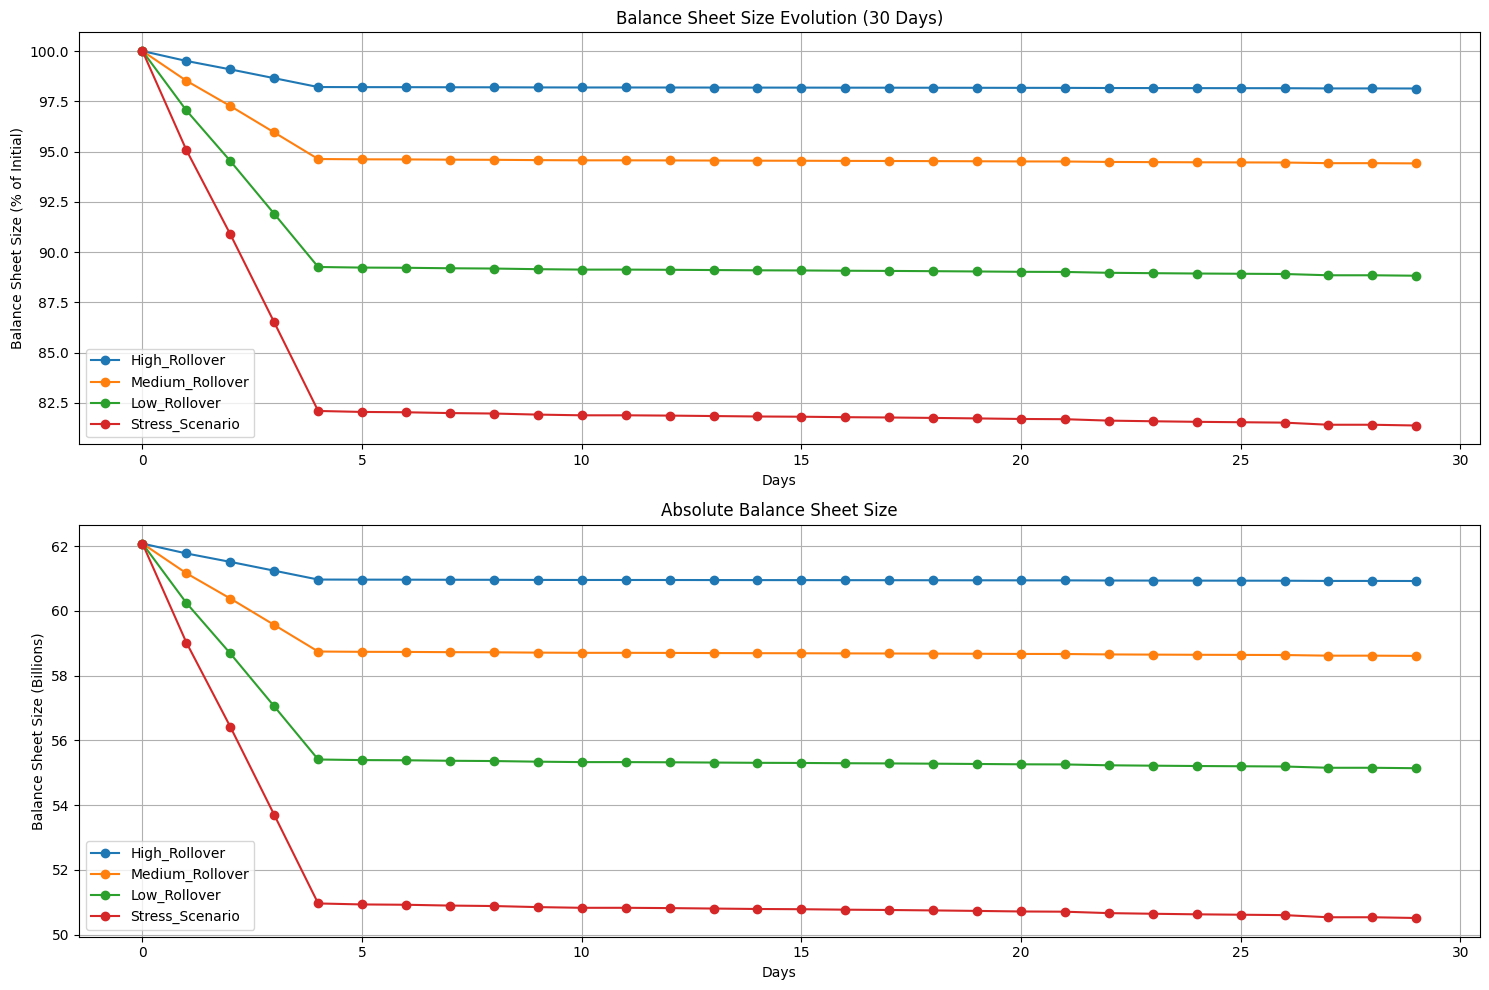

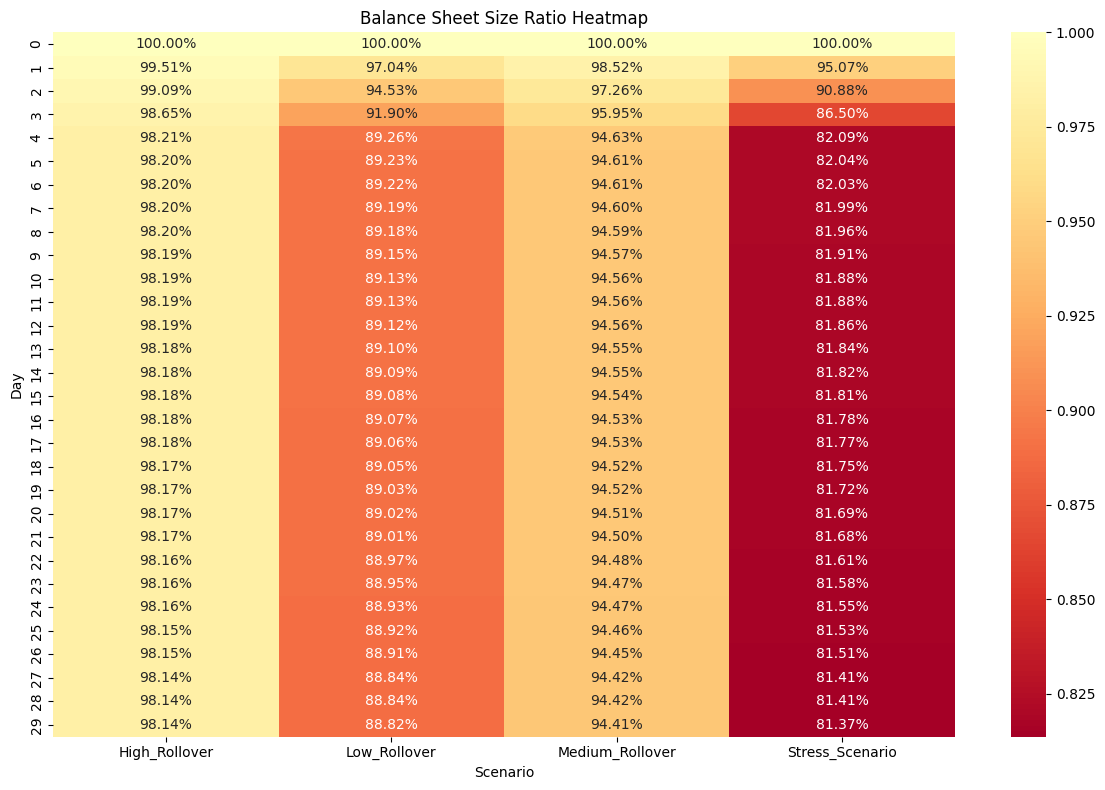


Detailed Statistics by Scenario:
--------------------------------------------------------------------------------

Scenario: High_Rollover
Initial Balance Sheet Size: $62.08B
Final Balance Sheet Size: $60.92B
Total Reduction: 1.86%
Minimum Size Ratio: 98.14%

Scenario: Medium_Rollover
Initial Balance Sheet Size: $62.08B
Final Balance Sheet Size: $58.61B
Total Reduction: 5.59%
Minimum Size Ratio: 94.41%

Scenario: Low_Rollover
Initial Balance Sheet Size: $62.08B
Final Balance Sheet Size: $55.14B
Total Reduction: 11.18%
Minimum Size Ratio: 88.82%

Scenario: Stress_Scenario
Initial Balance Sheet Size: $62.08B
Final Balance Sheet Size: $50.51B
Total Reduction: 18.63%
Minimum Size Ratio: 81.37%

Daily Balance Sheet Changes:
--------------------------------------------------------------------------------


Maturing_Amount                                                \
Scenario     High_Rollover  Low_Rollover Medium_Rollover Stress_Scenario   
Date                                                                       
2025-03-25    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-03-26    6.117477e+09  6.117477e+09    6.117477e+09    6.117477e+09   
2025-03-27    5.202568e+09  5.202568e+09    5.202568e+09    5.202568e+09   
2025-03-28    5.441773e+09  5.441773e+09    5.441773e+09    5.441773e+09   
2025-03-29    5.472182e+09  5.472182e+09    5.472182e+09    5.472182e+09   
2025-03-30    6.095867e+07  6.095867e+07    6.095867e+07    6.095867e+07   
2025-03-31    1.996104e+07  1.996104e+07    1.996104e+07    1.996104e+07   
2025-04-01    5.012865e+07  5.012865e+07    5.012865e+07    5.012865e+07   
2025-04-02    2.861636e+07  2.861636e+07    2.861636e+07    2.861636e+07   
2025-04-03    6.578711e+07  6.578711e+07    6.578711e+07    6.578711e+07   
2025-04-04    4.323797e+07  4.323797e+07    4.323797e+07    4.323797e+07   
2025-04-05    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-06    1.847493e+07  1.847493e+07    1.847493e+07    1.847493e+07   
2025-04-07    2.738043e+07  2.738043e+07    2.738043e+07    2.738043e+07   
2025-04-08    2.760398e+07  2.760398e+07    2.760398e+07    2.760398e+07   
2025-04-09    1.421145e+07  1.421145e+07    1.421145e+07    1.421145e+07   
2025-04-10    2.835605e+07  2.835605e+07    2.835605e+07    2.835605e+07   
2025-04-11    1.908970e+07  1.908970e+07    1.908970e+07    1.908970e+07   
2025-04-12    2.650499e+07  2.650499e+07    2.650499e+07    2.650499e+07   
2025-04-13    3.050800e+07  3.050800e+07    3.050800e+07    3.050800e+07   
2025-04-14    3.464423e+07  3.464423e+07    3.464423e+07    3.464423e+07   
2025-04-15    1.379851e+07  1.379851e+07    1.379851e+07    1.379851e+07   
2025-04-16    8.802485e+07  8.802485e+07    8.802485e+07    8.802485e+07   
2025-04-17    3.952065e+07  3.952065e+07    3.952065e+07    3.952065e+07   
2025-04-18    3.498960e+07  3.498960e+07    3.498960e+07    3.498960e+07   
2025-04-19    2.463170e+07  2.463170e+07    2.463170e+07    2.463170e+07   
2025-04-20    2.469884e+07  2.469884e+07    2.469884e+07    2.469884e+07   
2025-04-21    1.313495e+08  1.313495e+08    1.313495e+08    1.313495e+08   
2025-04-22    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-23    4.623163e+07  4.623163e+07    4.623163e+07    4.623163e+07   

               Reduction                                                \
Scenario   High_Rollover  Low_Rollover Medium_Rollover Stress_Scenario   
Date                                                                     
2025-03-25  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-03-26  3.058738e+08  1.835243e+09    9.176215e+08    3.058738e+09   
2025-03-27  2.601284e+08  1.560770e+09    7.803852e+08    2.601284e+09   
2025-03-28  2.720887e+08  1.632532e+09    8.162660e+08    2.720887e+09   
2025-03-29  2.736091e+08  1.641655e+09    8.208274e+08    2.736091e+09   
2025-03-30  3.047933e+06  1.828760e+07    9.143800e+06    3.047933e+07   
2025-03-31  9.980520e+05  5.988312e+06    2.994156e+06    9.980520e+06   
2025-04-01  2.506432e+06  1.503859e+07    7.519297e+06    2.506432e+07   
2025-04-02  1.430818e+06  8.584908e+06    4.292454e+06    1.430818e+07   
2025-04-03  3.289356e+06  1.973613e+07    9.868067e+06    3.289356e+07   
2025-04-04  2.161898e+06  1.297139e+07    6.485695e+06    2.161898e+07   
2025-04-05  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-06  9.237463e+05  5.542478e+06    2.771239e+06    9.237463e+06   
2025-04-07  1.369022e+06  8.214129e+06    4.107065e+06    1.369022e+07   
2025-04-08  1.380199e+06  8.281193e+06    4.140597e+06    1.380199e+07   
2025-04-09  7.105725e+05  4.263435e+06    2.131718e+06    7.105725e+06   
2025-04-10  1.417803e+06  8.506816e+06    4.253408e+06    1.417803e+07   
2025-04-11  9.544851e+

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from IPython.display import display

def simulate_balance_sheet_valuation(balance_sheet_df, simulation_days=30):
    scenarios = {
        'High_Rollover': {
            'short_term_prob': 0.95,
            'medium_term_prob': 0.90,
            'long_term_prob': 0.98,
            'new_funding_ratio': 1.0,
            'asset_reduction_factor': 0.05
        },
        'Medium_Rollover': {
            'short_term_prob': 0.80,
            'medium_term_prob': 0.75,
            'long_term_prob': 0.85,
            'new_funding_ratio': 0.8,
            'asset_reduction_factor': 0.15
        },
        'Low_Rollover': {
            'short_term_prob': 0.60,
            'medium_term_prob': 0.55,
            'long_term_prob': 0.65,
            'new_funding_ratio': 0.5,
            'asset_reduction_factor': 0.30
        },
        'Stress_Scenario': {
            'short_term_prob': 0.30,
            'medium_term_prob': 0.25,
            'long_term_prob': 0.35,
            'new_funding_ratio': 0.2,
            'asset_reduction_factor': 0.50
        }
    }

    all_results = []
    initial_bs_size = balance_sheet_df[balance_sheet_df['side'] == 'Asset']['amount'].sum()

    for scenario_name, params in scenarios.items():
        current_bs = balance_sheet_df.copy()
        current_date = datetime.now()

        # Initialize current_assets at the start
        current_assets = initial_bs_size

        for day in range(simulation_days):
            simulation_date = current_date + timedelta(days=day)

            # Identify maturing liabilities
            maturing_mask = (current_bs['side'] == 'Liability') & \
                          (current_bs['maturity_date'].dt.date == simulation_date.date())
            maturing_liabilities = current_bs[maturing_mask]

            # Calculate reductions
            total_maturing = maturing_liabilities['amount'].sum()
            if total_maturing > 0:
                # Calculate reduction based on scenario parameters
                reduction = total_maturing * params['asset_reduction_factor']
                # Apply reduction to current assets
                current_assets = max(current_assets - reduction, current_assets * 0.5)

            # Store daily results
            all_results.append({
                'Date': simulation_date.strftime('%Y-%m-%d'),
                'Scenario': scenario_name,
                'Total_Assets': current_assets,
                'BS_Size_Ratio': current_assets / initial_bs_size,
                'Day': day,
                'Maturing_Amount': total_maturing,
                'Reduction': reduction if total_maturing > 0 else 0
            })

    return pd.DataFrame(all_results)

# Run simulation
simulation_results = simulate_balance_sheet_valuation(balance_sheet)

# Create summary table
summary_pivot = simulation_results.pivot_table(
    index='Day',
    columns='Scenario',
    values='BS_Size_Ratio',
    aggfunc='first'
)

print("\nBalance Sheet Size Ratio by Day and Scenario:")
print("-" * 80)
display(summary_pivot)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Balance Sheet Size Evolution
plt.subplot(2, 1, 1)
for scenario in simulation_results['Scenario'].unique():
    scenario_data = simulation_results[simulation_results['Scenario'] == scenario]
    plt.plot(scenario_data['Day'],
            scenario_data['BS_Size_Ratio'] * 100,
            label=scenario,
            marker='o')

plt.title('Balance Sheet Size Evolution (30 Days)')
plt.xlabel('Days')
plt.ylabel('Balance Sheet Size (% of Initial)')
plt.legend()
plt.grid(True)

# Plot 2: Absolute Balance Sheet Size
plt.subplot(2, 1, 2)
for scenario in simulation_results['Scenario'].unique():
    scenario_data = simulation_results[simulation_results['Scenario'] == scenario]
    plt.plot(scenario_data['Day'],
            scenario_data['Total_Assets'] / 1e9,
            label=scenario,
            marker='o')

plt.title('Absolute Balance Sheet Size')
plt.xlabel('Days')
plt.ylabel('Balance Sheet Size (Billions)')
plt.legend()
plt.grid(True)

plt.tight_layout()
display(plt.gcf())
plt.close()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(summary_pivot,
            annot=True,
            fmt='.2%',
            cmap='RdYlGn',
            center=1.0)
plt.title('Balance Sheet Size Ratio Heatmap')
plt.tight_layout()
display(plt.gcf())
plt.close()

# Print detailed statistics
print("\nDetailed Statistics by Scenario:")
print("-" * 80)
for scenario in simulation_results['Scenario'].unique():
    scenario_data = simulation_results[simulation_results['Scenario'] == scenario]
    print(f"\nScenario: {scenario}")
    print(f"Initial Balance Sheet Size: ${scenario_data.iloc[0]['Total_Assets']/1e9:.2f}B")
    print(f"Final Balance Sheet Size: ${scenario_data.iloc[-1]['Total_Assets']/1e9:.2f}B")
    print(f"Total Reduction: {(1 - scenario_data.iloc[-1]['BS_Size_Ratio'])*100:.2f}%")
    print(f"Minimum Size Ratio: {scenario_data['BS_Size_Ratio'].min()*100:.2f}%")

# Additional analysis: Daily changes
print("\nDaily Balance Sheet Changes:")
print("-" * 80)
daily_changes = simulation_results.pivot_table(
    index='Date',
    columns='Scenario',
    values=['Total_Assets', 'Maturing_Amount', 'Reduction'],
    aggfunc='first'
)
display(daily_changes)

# Save results
simulation_results.to_csv('detailed_simulation_results.csv', index=False)
summary_pivot.to_csv('summary_by_scenario.csv')

In [79]:
balance_sheet.columns

Index(['transaction_id', 'type', 'amount', 'start_date', 'maturity_date',
       'interest_rate', 'remaining_maturity_days', 'side', 'hqla_category',
       'haircut', 'maturity_year'],
      dtype='object')

### Simulation of Balance Sheet with LCR Calculation


**Purpose:**  
This code simulates a balance sheet over a 10-day period, calculating the Liquidity Coverage Ratio (LCR) under different rollover scenarios. It evaluates how liability maturities and asset availability impact the bank's liquidity position.


**Key Functions and Logic:**


- **`calculate_lcr_metrics`:**  
  This function calculates the High-Quality Liquid Assets (HQLA) value and the LCR based on maturing liabilities and assets. It considers the haircut applied to different HQLA categories and calculates net cash outflows.


- **`simulate_balance_sheet_with_lcr`:**  
  This function runs the simulation for four scenarios: High Rollover, Medium Rollover, Low Rollover, and Stress Scenario. Each scenario has specific probabilities for the success of short-term, medium-term, and long-term rollovers.


- **Daily Operations:**
  - For each day, the function identifies maturing liabilities and assets.
  - It calculates LCR metrics using `calculate_lcr_metrics` and prints relevant metrics such as HQLA and LCR.
  - If the LCR is below 1.0, it suggests the amount of additional HQLA needed. If it's above 1.5, it suggests the amount of excess HQLA that can be released.
  - The function simulates asset sales to cover liabilities when rollover probabilities are not met.


**Outputs:**


- The simulation results are stored in a DataFrame and printed as a grid showing the Date, Scenario, HQLA, LCR, and Recommendations for each day.


**Usage:**

To run this simulation, ensure you have a `balance_sheet` DataFrame with assigned HQLA categories. Execute the `simulate_balance_sheet_with_lcr` function to obtain the simulation results.


In [80]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def calculate_lcr_metrics(current_bs, maturing_liabilities, maturing_assets):
    """Calculate LCR and related metrics"""
    hqla_value = 0
    for category in ['Level 1', 'Level 2A', 'Level 2B']:
        assets = current_bs[
            (current_bs['side'] == 'Asset') &
            (current_bs['hqla_category'] == category)
        ]
        haircut = assets['haircut'].iloc[0] if len(assets) > 0 else 0
        hqla_value += assets['amount'].sum() * (1 - haircut)

    # Calculate outflows and inflows
    outflows = maturing_liabilities['amount'].sum()
    inflows = min(maturing_assets['amount'].sum(), 0.75 * outflows)
    net_outflows = max(outflows - inflows, 0.01)

    # Calculate LCR
    lcr = hqla_value / net_outflows

    return {
        'hqla': hqla_value,
        'outflows': outflows,
        'inflows': inflows,
        'net_outflows': net_outflows,
        'lcr': lcr
    }

def simulate_balance_sheet_with_lcr(balance_sheet_df, simulation_days=10):
    scenarios = {
        'High_Rollover': {
            'short_term_prob': 0.75,
            'medium_term_prob': 0.70,
            'long_term_prob': 0.60
        },
        'Medium_Rollover': {
            'short_term_prob': 0.60,
            'medium_term_prob': 0.55,
            'long_term_prob': 0.50
        },
        'Low_Rollover': {
            'short_term_prob': 0.50,
            'medium_term_prob': 0.45,
            'long_term_prob': 0.40
        },
        'Stress_Scenario': {
            'short_term_prob': 0.30,
            'medium_term_prob': 0.25,
            'long_term_prob': 0.20
        }
    }

    all_results = []

    for scenario_name, params in scenarios.items():
        current_bs = balance_sheet_df.copy()
        current_date = datetime.now()

        for day in range(simulation_days):
            simulation_date = current_date + timedelta(days=day)

            maturing_liabilities = current_bs[
                (current_bs['side'] == 'Liability') &
                (current_bs['maturity_date'].dt.date == simulation_date.date())
            ]

            maturing_assets = current_bs[
                (current_bs['side'] == 'Asset') &
                (current_bs['maturity_date'].dt.date == simulation_date.date())
            ]

            lcr_metrics = calculate_lcr_metrics(
                current_bs, maturing_liabilities, maturing_assets
            )

            print(f"\nDay {day} ({simulation_date.strftime('%Y-%m-%d')}) - Scenario: {scenario_name}")
            print(f"HQLA: ${lcr_metrics['hqla']:.2f}")
            print(f"LCR: {lcr_metrics['lcr']:.2f}")

            recommendations = []
            if lcr_metrics['lcr'] < 1.0:
                shortfall = (1.0 - lcr_metrics['lcr']) * lcr_metrics['net_outflows']
                recommendations.append(f"LCR below minimum: Need ${shortfall/1e6:.1f}M additional HQLA")
            elif lcr_metrics['lcr'] > 1.5:
                excess = (lcr_metrics['lcr'] - 1.5) * lcr_metrics['net_outflows']
                recommendations.append(f"Excess HQLA: Can release ${excess/1e6:.1f}M")

            all_results.append({
                'Date': simulation_date.strftime('%Y-%m-%d'),
                'Scenario': scenario_name,
                'HQLA': lcr_metrics['hqla'],
                'Net_Cash_Outflows': lcr_metrics['net_outflows'],
                'LCR': lcr_metrics['lcr'],
                'Recommendations': '; '.join(recommendations)
            })

            for _, liability in maturing_liabilities.iterrows():
                maturity_days = (liability['maturity_date'] - liability['start_date']).days
                prob = params['short_term_prob'] if maturity_days <= 90 else (
                    params['medium_term_prob'] if maturity_days <= 365 else params['long_term_prob']
                )
                if np.random.random() >= prob:
                    hqla_assets = current_bs[(current_bs['side'] == 'Asset') &
                                             (current_bs['hqla_category'] != 'Non-HQLA')]
                    if not hqla_assets.empty:
                        hqla_assets.sort_values(by='amount', ascending=False, inplace=True)
                        for _, asset in hqla_assets.iterrows():
                            if liability['amount'] > 0:
                                sell_amount = min(asset['amount'], liability['amount'])
                                liability['amount'] -= sell_amount
                                current_bs.loc[current_bs['transaction_id'] == asset['transaction_id'], 'amount'] -= sell_amount
                                if current_bs.loc[current_bs['transaction_id'] == asset['transaction_id'], 'amount'].sum() <= 0:
                                    current_bs = current_bs[current_bs['transaction_id'] != asset['transaction_id']]
                else:
                    new_maturity_date = liability['maturity_date'] + timedelta(days=maturity_days)
                    new_liability = pd.DataFrame([{
                        'transaction_id': liability['transaction_id'],
                        'side': 'Liability',
                        'amount': liability['amount'],
                        'start_date': liability['maturity_date'],
                        'maturity_date': new_maturity_date
                    }])
                    current_bs = pd.concat([current_bs, new_liability], ignore_index=True)

    return pd.DataFrame(all_results)

# Assuming balance_sheet is your existing DataFrame with HQLA categories assigned
# Run simulation
simulation_results = simulate_balance_sheet_with_lcr(balance_sheet)

# Display the grid of results
print("\nGrid of Scenario Results:")
print("-" * 80)
print(simulation_results[['Date', 'Scenario', 'HQLA', 'LCR', 'Recommendations']])


Day 0 (2025-03-25) - Scenario: High_Rollover
HQLA: $10115845332.06
LCR: 1011584533206.40

Day 1 (2025-03-26) - Scenario: High_Rollover
HQLA: $10115845332.06
LCR: 1.65

Day 2 (2025-03-27) - Scenario: High_Rollover
HQLA: $9131266259.16
LCR: 0.93

Day 3 (2025-03-28) - Scenario: High_Rollover
HQLA: $7450770996.78
LCR: 0.84

Day 4 (2025-03-29) - Scenario: High_Rollover
HQLA: $5803656466.34
LCR: 0.49

Day 5 (2025-03-30) - Scenario: High_Rollover
HQLA: $3799182574.22
LCR: 1.96

Day 6 (2025-03-31) - Scenario: High_Rollover
HQLA: $3506161951.07
LCR: 0.43

Day 7 (2025-04-01) - Scenario: High_Rollover
HQLA: $2136239875.63
LCR: 1.89

Day 8 (2025-04-02) - Scenario: High_Rollover
HQLA: $1995994012.95
LCR: 0.28

Day 9 (2025-04-03) - Scenario: High_Rollover
HQLA: $624516904.59
LCR: 0.17

Day 0 (2025-03-25) - Scenario: Medium_Rollover
HQLA: $10115845332.06
LCR: 1011584533206.40

Day 1 (2025-03-26) - Scenario: Medium_Rollover
HQLA: $10115845332.06
LCR: 1.65

Day 2 (2025-03-27) - Scenario: Medium_Rollov

### Visualization of LCR and Balance Sheet Metrics


**Purpose:**  
This code visualizes key financial metrics from a simulation, highlighting trends in the Liquidity Coverage Ratio (LCR), High-Quality Liquid Assets (HQLA), and balance sheet size under different scenarios.


**Function Description:**


- **`plot_simulation_results`:**  
  This function creates a series of plots to compare different scenarios, helping stakeholders understand the impact of various financial strategies.


**Plotting Details:**


- **LCR Trends Plot:**  
  - A line plot shows the LCR over time for each scenario.
  - A horizontal red line at LCR = 1 indicates the minimum required threshold, helping to quickly identify scenarios where the LCR may fall below regulatory requirements.


- **HQLA vs. Liabilities Plot:**  
  - This plot compares HQLA to net cash outflows (liabilities) across scenarios, illustrating liquidity risk and the potential need for additional high-quality assets.


- **Balance Sheet Size Plot:**  
  - Displays the total HQLA and net outflows for each scenario, providing insights into balance sheet dynamics and financial stability.


**Chart Customization:**


- The plots include labeled axes, titles, legends, and grid lines for improved readability and interpretation.
- X-ticks are rotated for better visibility, and `plt.tight_layout()` is used to ensure the layout is clear and non-overlapping.


**Output:**  
The visualizations offer a comprehensive view of the financial simulation, allowing for a clear comparison of how different scenarios impact key liquidity and balance sheet metrics over time.


**Usage:**  
To utilize this function, ensure `simulation_results` is the DataFrame obtained from the simulation. Call `plot_simulation_results(simulation_results)` to generate the plots.

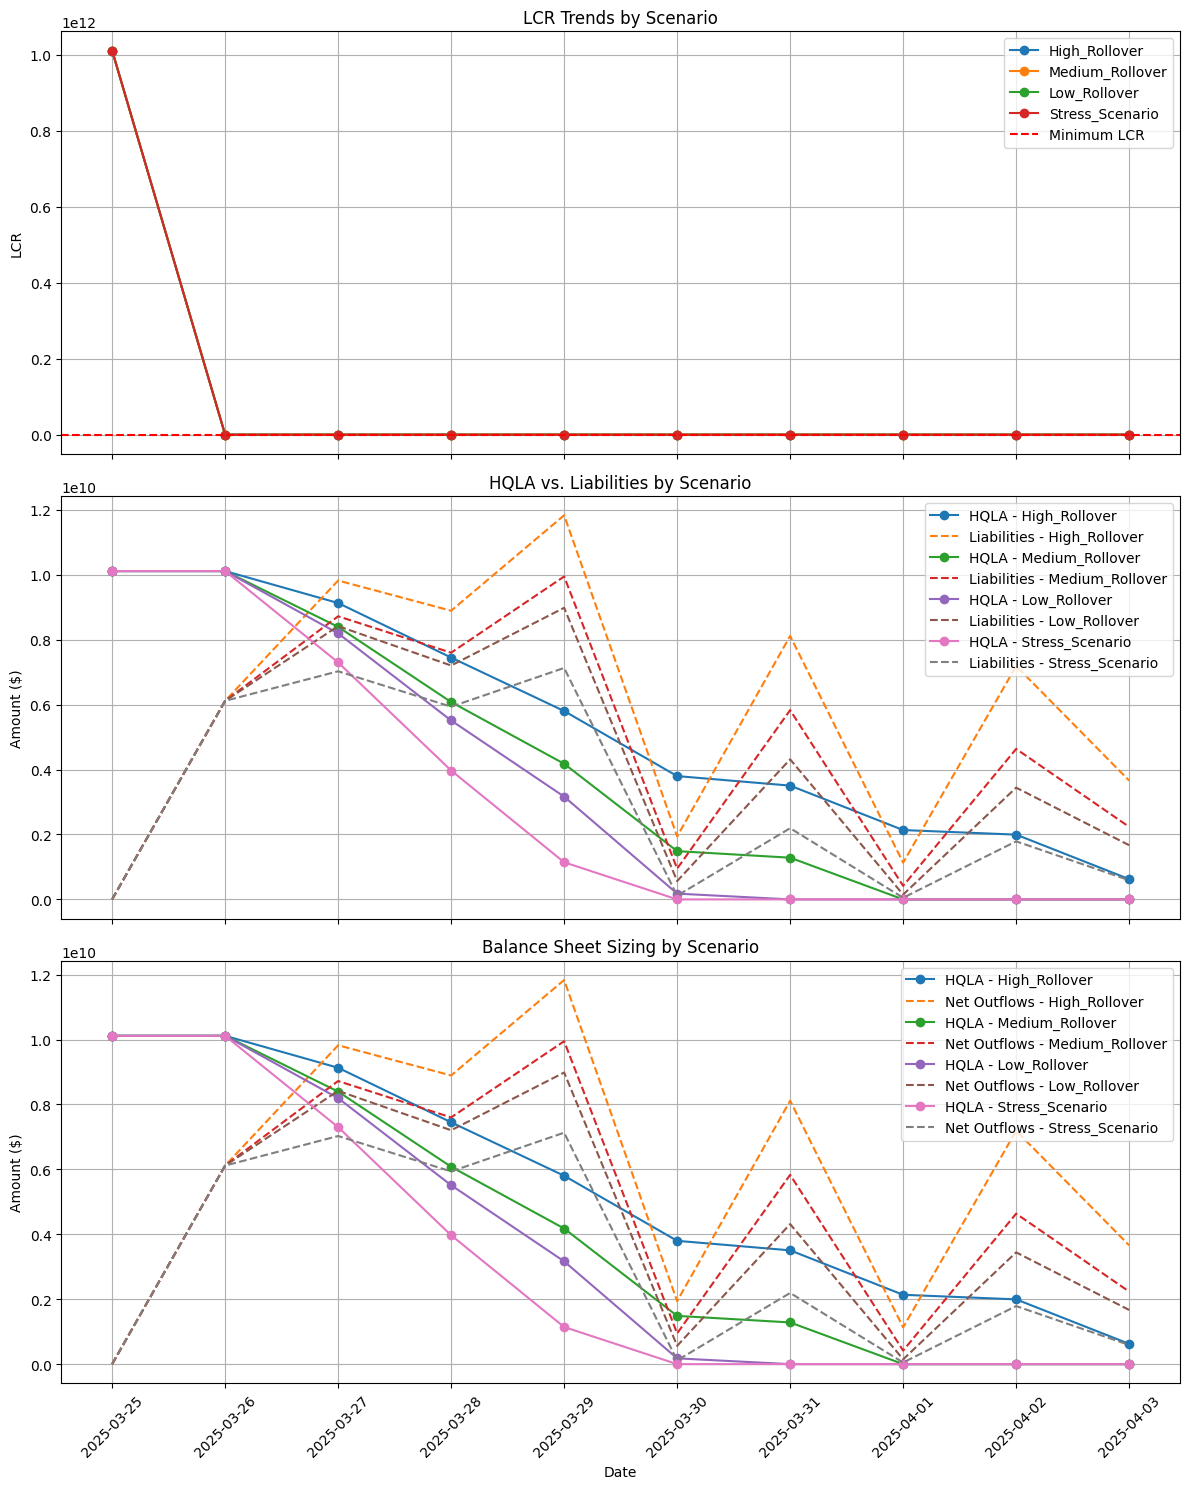

In [81]:
import matplotlib.pyplot as plt

def plot_simulation_results(results_df):
    """Plot the simulation results to visualize LCR and balance sheet metrics."""

    # Set up the plot
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

    # Plot LCR trends
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[0].plot(scenario_data['Date'], scenario_data['LCR'], label=scenario, marker='o')

    axes[0].axhline(y=1.0, color='red', linestyle='--', label='Minimum LCR')
    axes[0].set_title('LCR Trends by Scenario')
    axes[0].set_ylabel('LCR')
    axes[0].legend()
    axes[0].grid(True)

    # Plot HQLA vs. Liabilities
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[1].plot(scenario_data['Date'], scenario_data['HQLA'], label=f'HQLA - {scenario}', marker='o')
        axes[1].plot(scenario_data['Date'], scenario_data['Net_Cash_Outflows'], label=f'Liabilities - {scenario}', linestyle='--')

    axes[1].set_title('HQLA vs. Liabilities by Scenario')
    axes[1].set_ylabel('Amount ($)')
    axes[1].legend()
    axes[1].grid(True)

    # Plot Balance Sheet Size
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[2].plot(scenario_data['Date'], scenario_data['HQLA'], label=f'HQLA - {scenario}', marker='o')
        axes[2].plot(scenario_data['Date'], scenario_data['Net_Cash_Outflows'], label=f'Net Outflows - {scenario}', linestyle='--')

    axes[2].set_title('Balance Sheet Sizing by Scenario')
    axes[2].set_ylabel('Amount ($)')
    axes[2].set_xlabel('Date')
    axes[2].legend()
    axes[2].grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming simulation_results is the DataFrame obtained from the simulation
plot_simulation_results(simulation_results)